In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [14]:
dataset=load_digits()
dataset.keys() # shows All details of what we can see

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [15]:
df=pd.DataFrame(dataset.data,columns=dataset.feature_names)
df

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0


<Figure size 432x288 with 0 Axes>

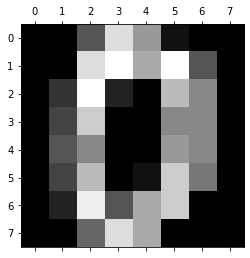

In [17]:
plt.gray()
plt.matshow(dataset.data[0].reshape(8,8))

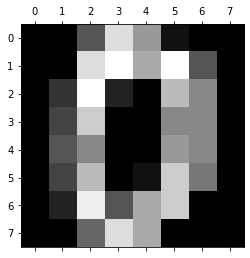

In [16]:
plt.matshow(dataset.data[0].reshape(8,8))

In [6]:
df_new=pd.DataFrame(np.random.randint(10,30,size=(10,3)),columns=['col_1','col_2','col_3'])
df_new

,col_1,col_2,col_3
0,25,14,13
1,14,27,25
2,15,22,21
3,17,26,22
4,11,22,22
5,19,26,14
6,22,29,22
7,29,16,18
8,18,18,16
9,28,24,10


In [7]:
df_new['Target']=np.array([1,4,5,7,8,9,5,2,3,1])

In [8]:
df_new

,col_1,col_2,col_3,Target
0,25,14,13,1
1,14,27,25,4
2,15,22,21,5
3,17,26,22,7
4,11,22,22,8
5,19,26,14,9
6,22,29,22,5
7,29,16,18,2
8,18,18,16,3
9,28,24,10,1


In [9]:
x=df_new.drop('Target',axis=1)
y=df_new['Target']

In [10]:
std_scaler=StandardScaler()
std_array=std_scaler.fit_transform(x)
std_array

array([[ 0.90575292, -1.77324139, -1.14542732],
       [-1.01026287,  0.97106076,  1.44799302],
       [-0.83607962, -0.08444007,  0.58351958],
       [-0.48771311,  0.7599606 ,  0.79963794],
       [-1.53281263, -0.08444007,  0.79963794],
       [-0.1393466 ,  0.7599606 , -0.92930895],
       [ 0.38320316,  1.39326109,  0.79963794],
       [ 1.60248593, -1.35104106, -0.06483551],
       [-0.31352986, -0.92884073, -0.49707223],
       [ 1.42830268,  0.33776026, -1.7937824 ]])

In [11]:
df1=pd.DataFrame(std_array,columns=x.columns)
df1

,col_1,col_2,col_3
0,0.905753,-1.773241,-1.145427
1,-1.010263,0.971061,1.447993
2,-0.836080,-0.084440,0.583520
3,-0.487713,0.759961,0.799638
4,-1.532813,-0.084440,0.799638
5,-0.139347,0.759961,-0.929309
6,0.383203,1.393261,0.799638
7,1.602486,-1.351041,-0.064836
8,-0.313530,-0.928841,-0.497072
9,1.428303,0.337760,-1.793782


In [12]:
df1.cov()

,col_1,col_2,col_3
col_1,1.111111,-0.413460,-0.742009
col_2,-0.413460,1.111111,0.475489
col_3,-0.742009,0.475489,1.111111


In [13]:
np.linalg.eigvals(df1.cov())

array([2.21227588, 0.36509815, 0.7559593 ])

In [14]:
eigen_value,eigen_vector=np.linalg.eig(df1.cov())
eigen_value

array([2.21227588, 0.36509815, 0.7559593 ])

In [15]:
eigen_vector

array([[-0.60556473,  0.67652569, -0.41905172],
       [ 0.49606927, -0.09084148, -0.86351786],
       [ 0.6222593 ,  0.73079465,  0.28059321]])

In [ ]:
plt.matshow()

<Figure size 432x288 with 0 Axes>

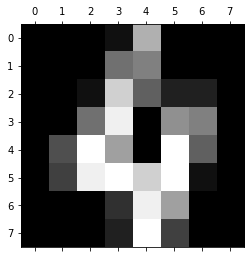

In [16]:
plt.gray()
plt.matshow(dataset.data[4].reshape(8,8))

<Figure size 432x288 with 0 Axes>

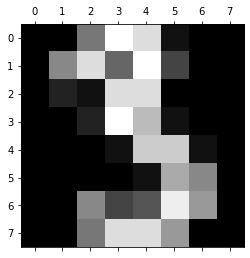

In [17]:
plt.gray()
plt.matshow(dataset.data[3].reshape(8,8))

In [18]:
x=df
y=dataset.target

In [19]:
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)
x_scaled
    

array([[ 0.        , -0.33501649, -0.04308102, ..., -1.14664746,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  0.54856067,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  1.56568555,
         1.6951369 , -0.19600752],
       ...,
       [ 0.        , -0.33501649, -0.88456568, ..., -0.12952258,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -0.67419451, ...,  0.8876023 ,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649,  1.00877481, ...,  0.8876023 ,
        -0.26113572, -0.19600752]])

In [20]:
x_scaled.shape

(1797, 64)

In [21]:
pca=PCA(0.95) # 95% of data contribution features are consider so 5% data contribution features are not considering
x_pca=pca.fit_transform(x_scaled)
x_pca

array([[ 1.91421366, -0.95450157, -3.94603482, ...,  0.81405925,
         0.0249306 ,  0.32193146],
       [ 0.58898033,  0.9246358 ,  3.92475494, ...,  0.20026094,
         0.08710843, -0.48914299],
       [ 1.30203906, -0.31718883,  3.02333293, ..., -0.214596  ,
        -1.2788745 ,  0.54583387],
       ...,
       [ 1.02259599, -0.14791087,  2.46997365, ...,  0.60136463,
         0.41238798,  1.20886377],
       [ 1.07605522, -0.38090625, -2.45548693, ...,  0.43756556,
        -0.69863483, -0.44339963],
       [-1.25770233, -2.22759088,  0.28362789, ..., -0.38108638,
         0.12855104,  1.32137195]])

In [22]:
x_pca.shape

(1797, 40)

In [23]:
pca.explained_variance_

array([7.34477606, 5.83549054, 5.15396118, 3.96623597, 2.9663452 ,
       2.57204442, 2.40600941, 2.06867355, 1.82993314, 1.78951739,
       1.69784616, 1.57287889, 1.38870781, 1.35933609, 1.32152536,
       1.16829176, 1.08368678, 0.99977862, 0.97438293, 0.90891242,
       0.82271926, 0.77631014, 0.71155675, 0.64552365, 0.59527399,
       0.5765018 , 0.52673155, 0.5106363 , 0.48686381, 0.45560107,
       0.44285155, 0.42230086, 0.3991063 , 0.39110111, 0.36094517,
       0.34860306, 0.3195963 , 0.29406627, 0.27692285, 0.258273  ])

In [24]:
pca.explained_variance_ratio_ # varience always for single variable so we have 40 features so 40 varience ratios we got

array([0.12033916, 0.09561054, 0.08444415, 0.06498408, 0.04860155,
       0.0421412 , 0.03942083, 0.03389381, 0.02998221, 0.02932003,
       0.02781805, 0.02577055, 0.02275303, 0.0222718 , 0.02165229,
       0.01914167, 0.01775547, 0.01638069, 0.0159646 , 0.01489191,
       0.0134797 , 0.01271931, 0.01165837, 0.01057647, 0.00975316,
       0.00944559, 0.00863014, 0.00836643, 0.00797693, 0.00746471,
       0.00725582, 0.00691911, 0.00653909, 0.00640793, 0.00591384,
       0.00571162, 0.00523637, 0.00481808, 0.00453719, 0.00423163])

In [25]:
pca.n_components_ # number of varience ratios AND this is nothing but no. of components

40

In [26]:
pca.n_components # taken 95% while doing pca

0.95

In [27]:
x_train_pca,x_test_pca,y_train_pca,y_test_pca=train_test_split(x_pca,y,test_size=0.2,random_state=7)

In [28]:
model=LogisticRegression()
model.fit(x_train_pca,y_train_pca)
print(model.score(x_test_pca,y_test_pca)) # we can check accuracy directly by using score function accuracy for testing
print(model.score(x_train_pca,y_train_pca)) #accuracy for training


0.9444444444444444
0.9965205288796103


C:\Users\Admin\AKSHAY\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [29]:
pca = PCA(n_components=5) # replacing of percentage we are considering directly number of components 
x_pca = pca.fit_transform(x_scaled) # so we consider 5 components out of 60 components and preferrable way is percentage
x_pca.shape

(1797, 5)

In [30]:
pca.explained_variance_ratio_

array([0.12033916, 0.09561054, 0.08444415, 0.06498408, 0.04860148])

In [31]:
x_train_pca, x_test_pca, y_train_pca, y_test_pca = train_test_split(x_pca, y, test_size=0.2, random_state=27) 

In [32]:
model = LogisticRegression()
model.fit(x_train_pca, y_train_pca)
model.score(x_test_pca,y_test_pca)

C:\Users\Admin\AKSHAY\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.7916666666666666